In [1]:
float tau = 20.3;
float t_min = 15. + tau;
int size = 132;

In [2]:
ctrl A = 1;
ctrl A' = 1;
ctrl Mail = 0;
atomic ctrl M = 2;
ctrl Snd = 0;
ctrl Ready = 0;
ctrl New = 0;
ctrl Fun = 0;

a0

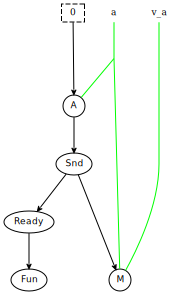

In [3]:
big a0 = A{a}.Snd.(M{a, v_a} | Ready.Fun.1);

In [4]:
react snd =
  A{a0}.Snd.(M{a1, v} | id) | Mail
  -->
  A{a0} | Mail.(M{a1, v} | id);

snd

,→,


In [5]:
float m_size = 8464.;
react snd =
  A{a0}.Snd.(M{a1, v} | id) | Mail
  -[ 1./(m_size + (2. * 0.112)) ]->
  A{a0} | Mail.(M{a1, v} | id);

snd

,→,


In [6]:
react new =
  A{a0}.(New.(A'{a1} | id) | id)
  -->
  A{a0}.(id | id) | A{a1}.(id | id)
  @ [1, 2, 0, 2];

new

,→,


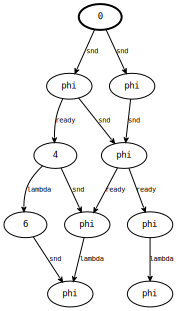

In [7]:
%states
react ready =
  A{a}.Ready | Mail.(M{a, v} | id)
  -->
  A{a} | Mail | {v};

react lambda = A{a}.Fun --> A{a};

big a1 = A{b}.Snd.M{a, v_b};

big s0 = a0 | a1 | Mail.1;

# Predicate
big phi = Mail.(M{a, v} | id);

float m_size = 8464.;
react snd =
  A{a0}.Snd.(M{a1, v} | id) | Mail
  -[ 1./(m_size + (2. * 0.112)) ]->
  A{a0} | Mail.(M{a1, v} | id);

# Reactive system
begin brs
  init s0;
  rules = [ {snd, ready, lambda, new} ];
  preds = { phi };
end


BigraphER: Bigraph Evaluator & Rewriting
Version:       1.7.0
Date:          Thu Aug 02 08:43:07 2018
Hostname:      tux
OS type:       Unix
Command line:  bigrapher validate -d jupyter-images/8 -f svg [8].big
Parsing model file [8].big ...
File '[8].big', line 18, characters 0-113
File '[8].big', line 28, characters 0-17
Type:          BRS
Bindings:      20      
# of rules:    1       
Exporting declarations to jupyter-images/8 ...
Model file parsed correctly


n_0

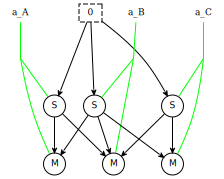

In [8]:
%output
ctrl S = 1;            # Signal range
atomic ctrl M = 1;     # Mobile station

big n_0 =
  share (M{a_A} || M{a_B} || M{a_C})
  by ([{0, 1}, {0, 1, 2}, {1, 2}], 3)
  in (id{a_A, a_B, a_C} | S{a_A} | S{a_B} | S{a_C});


BigraphER: Bigraph Evaluator & Rewriting
Version:       1.7.0
Date:          Thu Aug 02 08:43:09 2018
Hostname:      tux
OS type:       Unix
Command line:  bigrapher full -t jupyter-images/9/[9] -f svg -s jupyter-images/9 [9].big
Parsing model file [9].big ...
File '[9].big', line 18, characters 0-113
File '[9].big', line 28, characters 0-17
Type:          BRS
Bindings:      20      
# of rules:    1       
Computing transition system ...
Max # states:  1000    

[.]

Build time:    9.20296e-05
States:        1       
Transitions:   1       
Occurrences:   1       
Exporting BRS to jupyter-images/9/[9].svg ...
Exporting states to jupyter-images/9 ...


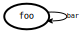

In [9]:
%output
%states
ctrl Foo = 0;
big foo = Foo.1;
react bar = foo --> foo;
begin brs
  init foo;
  rules = [{bar}];
  preds = {foo};
end

In [10]:
%ocaml

open Bigraph

let () =
  let a0 =
    Big.nest
      (Big.ion (Link.parse_face ["a"]) (Ctrl.C ("A", [], 1)))
      (Big.nest
	 (Big.ion (Link.Face.empty) (Ctrl.C ("Snd", [], 0)))
	 (Big.par
	    (Big.nest
	       (Big.ion (Link.parse_face ["a"; "v_a"]) (Ctrl.C ("M", [], 2)))
	       Big.one)
	    (Big.nest
	       (Big.ion (Link.Face.empty) (Ctrl.C ("Ready", [], 0)))
	       (Big.nest
		  (Big.ion (Link.Face.empty) (Ctrl.C ("Fun", [], 0)))
		  Big.one)))) in
  print_endline ("bigraph a0:\n" ^ (Big.to_string a0))

bigraph a0:
{(0, A:1),(1, Snd:0),(2, M:2),(3, Ready:0),(4, Fun:0)}
1 5 0
10000
01000
00110
00000
00001
00000
({}, {a}, {(0, 1), (2, 1)})
({}, {v_a}, {(2, 1)})


In [11]:
%ocaml
let x = (4 + 1) * 3
let y = "Hello " ^ "World"
let z = List.map (fun x -> x * 2) [1; 2; 3]

val x : int = 15


val y : string = "Hello World"


val z : int list = [2; 4; 6]


In [12]:
%ocaml
open Bigraph

let () =
  let foo = Big.one in
  print_endline (Big.to_string foo)

{}
1 0 0


In [13]:
%ocaml
#require "jupyter-archimedes"

Module Archimedes loaded and aliased as A.


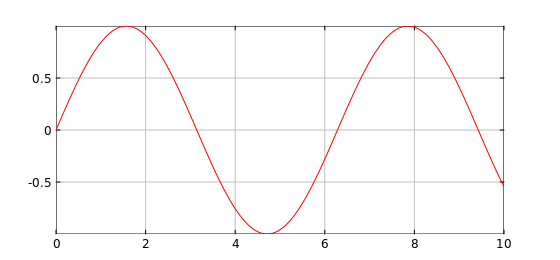

- : unit = ()


In [14]:
%ocaml
let vp = A.init ~w:560. ~h:260. ["jupyter"] in
A.Axes.box vp ;
A.set_color vp A.Color.red ;
A.fx vp sin 0.0 10.0 ;
A.close vp

a0

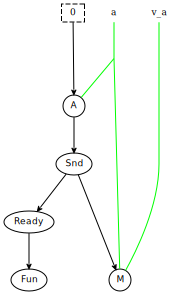

a1

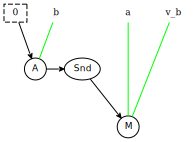

s0

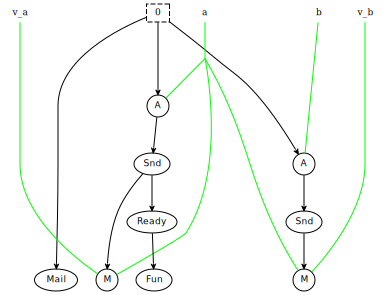

phi

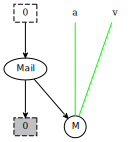

snd

,→,


ready

,→,


lambda

,→,


new

,→,


In [1]:

# Signature
ctrl A = 1;
ctrl A' = 1;
ctrl Mail = 0;
atomic ctrl M = 2;
ctrl Snd = 0;
ctrl Ready = 0;
ctrl New = 0;
ctrl Fun = 0;

# Reaction rules
react snd =
  A{a0}.Snd.(M{a1, v} | id) | Mail
  -->
  A{a0} | Mail.(M{a1, v} | id);

react ready =
  A{a}.Ready | Mail.(M{a, v} | id)
  -->
  A{a} | Mail | {v};

react lambda = A{a}.Fun --> A{a};

react new =
  A{a0}.(New.(A'{a1} | id) | id)
  -->
  A{a0}.(id | id) | A{a1}.(id | id)
  @ [1, 2, 0, 2];

# Initial state
big a0 = A{a}.Snd.(M{a, v_a} | Ready.Fun.1);

big a1 = A{b}.Snd.M{a, v_b};

big s0 = a0 | a1 | Mail.1;

# Predicate
big phi = Mail.(M{a, v} | id);

# Reactive system
begin brs
  init s0;
  rules = [ {snd, ready, lambda, new} ];
  preds = { phi };
end

s0

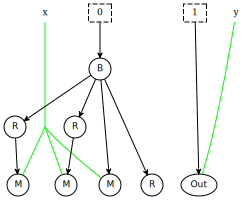

enter_room

,→,


leave_room

,→,


leave_building

,→,


In [2]:

# Example probabilistic BRS

atomic ctrl M = 1;  # Mobile device
ctrl R = 0;         # Room
ctrl B = 0;         # Building
ctrl Out = 1;       # External environment

big s0 =
  B.(R.M{x} | R.M{x} | R.1 | M{x}) || Out{y}.1;

float p_enter = 0.2;

react enter_room =
  R | M{x} -[p_enter]-> R.(M{x} | id);

react leave_room =
  R.(M{x} | id) -[1. - p_enter]-> R | M{x};

react leave_building =
  B.(M{x} | id) || Out{y} -[0.3]->   B | {x} || Out{y}.(id | M{y});

begin pbrs
  init s0;
  rules = [ { enter_room, leave_room, leave_building } ];
end

m_B

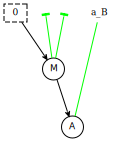

psi

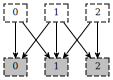

psi_1

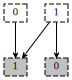

psi_2

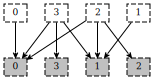

r

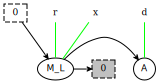

r1

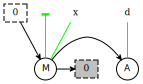

psi_3

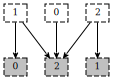

error

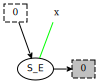

collision

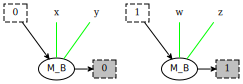

m_A

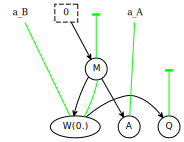

m_C

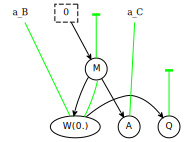

n_0

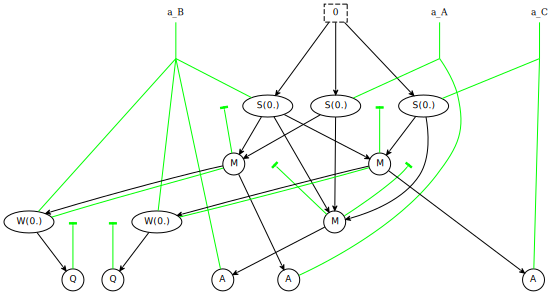

m_w

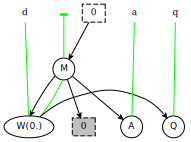

m_l

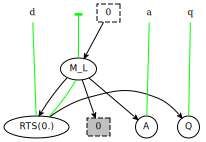

s

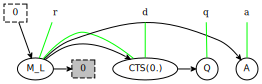

s1

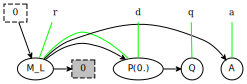

s2

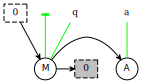

f

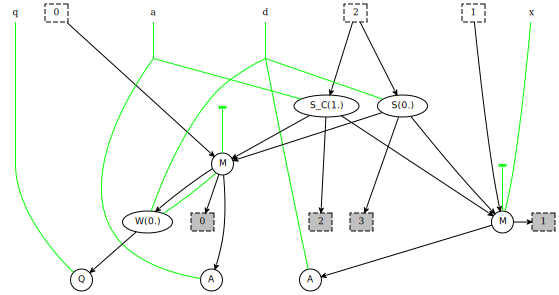

m_b

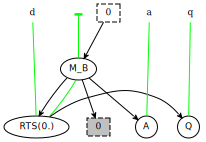

f_E

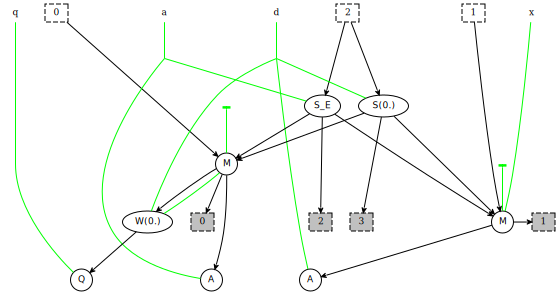

clr

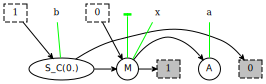

transmission

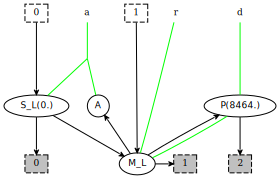

r_RTS

,→,


r_CTS

,→,


r_DATA

,→,


r_ACK

,→,


r_BACK1

,→,


r_BACK1E

,→,


r_BACK2

,→,


r_BACK2E

,→,


r_D

,→,


r_P

,→,


r_B

,→,


r_UD

,→,


r_UP

,→,


r_UC

,→,


In [3]:

#802.11 CSMA/CA with RTS/CTS

# Constants
float difs = 50.;
float sifs = 10.;
float tau = 20.;
float timeout = sifs + tau;
float rts = 160.;
float cts = 112.;
float ack = 112.;
float t_min = 15.;

# Rates
float rho2 = 1./(sifs + cts);
float rho4 = 1./(sifs + ack);
float rho5 = 1./(timeout);

# Signals (default, Locked, Clear, Error)
fun ctrl S(t) = 1;
fun ctrl S_L(t) = 1;
fun ctrl S_C(t) = 1;
ctrl S_E = 1;

# Machines (default, Locked, Deferred, Potential collision, Backoff)
ctrl M = 2;
ctrl M_L = 2;
ctrl M_D = 2;
ctrl M_P = 2;
ctrl M_B = 2;

# Triangles (Waiting, RTS, CTS, Data packet)
fun ctrl W(l) = 2;
fun ctrl RTS(l) = 2;
fun ctrl CTS(l) = 2;
fun ctrl P(l) = 2;

# Next triangle in the queue
atomic ctrl Q = 1;

# IP address
atomic ctrl A = 1;

# n_0
fun big m_A(l) = 
  /x /r /q (M{r, x}.(W(l){x,a_B}.Q{q} | A{a_A}));

big m_B =
  /x /r (M{r, x}.A{a_B});

fun big m_C(k) =
  /x /r /q (M{r, x}.(W(k){x,a_B}.Q{q} | A{a_C}));

big psi =
  ([{0,1}, {0,1,2}, {1,2}], 3);

fun big n_0(l,k,t_A,t_B,t_C) =
  share (m_A(l) || m_B || m_C(k))
  by psi
  in (id{a_A,a_B,a_C} | S(t_A){a_A} | S(t_B){a_B} | S(t_C){a_C} );

# Reaction rule 1
big psi_1 = ([{1}, {0,1}], 2);

fun big m_w(l) =
  /x /r (M{r,x}.(id | W(l){x,d}.Q{q} | A{a})); 

fun big m_l(l) =
  /x /r (M_L{r,x}.(id | RTS(l){x,d}.Q{q} | A{a})); 

fun react r_RTS(t,l) =
  share (id || m_w(l)) by psi_1 in (id(1, {a, d, q}) || S(t){a})
  -[ 1.0/(difs + tau*t/2.0 + rts) ]->
  share (id || m_l(l)) by psi_1 in (id(1, {a, d, q}) || S_L(t){a});

# Reaction rule 2
big psi_2 = ([{0,2,3}, {1,2,3}, {2}, {3}], 4);

fun big s(l) =
  /x (M_L{r,x}.(id | CTS(l){x,d}.Q{q} | A{a}));

big r = 
  M_L{r,x}.(id | A{d});
  
fun react r_CTS(t, u, l) =
  share (m_l(l) || M_D{r,x}.(id | A{d})|| id(2))
  by psi_2
  in (id(2, {x,a,d,q}) || (S_L(t){a} | S(u){d}) || /r)
  -[ rho2 ]->
  share (s(l) || r || id(2))
  by psi_2
  in (id(2, {x,a,d,q}) ||(S_L(t){a} | S_L(u){d}) || /r);

# Reaction rule 3
fun big s1(l) =
  /x (M_L{r,x}.(id | P(l){x,d}.Q{q} | A{a}));

fun react r_DATA(l) = 
  /r (s(l) || r)
  -[ 1.0 / (sifs + l) ]->
  /r (s1(l) || r);   

# Reaction rule 4
fun big s2(l) =
  /r (M{r,q}.(id | A{a}));

big r1 = 
  /r (M{r,x}.(id | A{d}));  

fun react r_ACK(t,u,l) = 
  share (s1(l) || r || id(2))
  by psi_2
  in (id(2,{x,a,q,d}) || (S_L(t){a} | S_L(u){d}) || /r)
  -[ rho4 ]->  
  share (s2(l) || r1 || id(2))
  by psi_2
  in (id(2,{x,a,q,d}) || (S_C(t_min){a} | S_C(u){d}));

# Reaction rule 5
fun big f(t,u,l) = 
  share (m_w(l) || M{r,x}.(id | A{d}) || id(2))
  by psi_2
  in (id(2,{x,a,q,d}) || (S_C(2.0*t+1.0){a} | S(u){d}) || /r);

fun big m_b(l) =
  /x /r (M_B{r,x}.(id | RTS(l){x,d}.Q{q} | A{a})); 

fun react r_BACK1(t,u,l) =
  share (m_b(l) || M_P{r,x}.(id | A{d}) || id(2))
  by psi_2
  in (id(2,{x,a,q,d}) || (S_L(t){a} | S(u){d}) || /r)
  -[ rho5 ]->
  f(t,u,l);
  
# After last transmission attempt
fun big f_E(u,l) =
  share (m_w(l) || M{r,x}.(id | A{d}) || id(2))
  by psi_2
  in (id(2,{x,a,q,d}) || (S_E{a} | S(u){d}) || /r);

fun react r_BACK1E(u,l) =
  share (m_b(l) || M_P{r,x}.(id | A{d}) || id(2))
  by psi_2
  in (id(2,{x,a,q,d}) || (S_L(1023.0){a} | S(u){d}) || /r)
  -[ rho5 ]->
  f_E(u,l);

# Reaction rule 6
fun react r_BACK2(t,u,l) =
  share (m_b(l) || M_D{r,x}.(id | A{d}) || id(2))
  by psi_2
  in (id(2,{x,a,q,d}) || (S_L(t){a} | S(u){d}) || /r)
  -[ rho5 ]->
  f(t,u,l);

# After last transmission attempt
fun react r_BACK2E(u,l) =
  share (m_b(l) || M_D{r,x}.(id | A{d}) || id(2))
  by psi_2
  in (id(2,{x,a,q,d}) || (S_L(1023.0){a} | S(u){d}) || /r)
  -[ rho5 ]->
  f_E(u,l);

# Reaction rule 7
fun react r_D(t) =
  share (id || M{r,x}.(id | A{a}))
  by psi_1
  in (id(1,{a,x}) || S_L(t){b} || /r)
  -[ inf ]->
  share (id || M_D{r,x}.(id | A{a}))
  by psi_1
  in (id(1,{a,x}) || S_L(t){b} || /r);  

# Reaction rule 8
big psi_3 = ([{1}, {2}, {0,1,2}], 3);

fun react r_P(t,u) = 
  share (id(2) || M_D{r,x}.(id | A{a}))
  by psi_3
  in (id(1,{a,x}) || (S_L(t){b} | S_L(u){c}) || /r)
  -[ inf ]->
  share (id(2) || M_P{r,x}.(id | A{a}))
  by psi_3
  in (id(1,{a,x}) || (S_L(t){b} | S_L(u){c}) || /r);  

# Reaction rule 9
fun react r_B(l) = 
  m_l(l) || /r M_P{r,x}.(id | A{d})
  -[ inf ]->
  m_b(l) || /r M_P{r,x}.(id | A{d});
  
# Reaction rule 10
fun big clr(t) =
  share (id || M{r,x}.(id | A{a}))
  by psi_1
  in (id(1,{a,x}) || S_C(t){b} || /r);

fun react r_UD(t) = 
  share (id || M_D{r,x}.(id | A{a}))
  by psi_1
  in (id(1,{a,x}) || S_C(t){b} || /r)
  -[ inf ]->
  clr(t);  

# Reaction rule 11
fun react r_UP(t) = 
  share (id || M_P{r,x}.(id | A{a}))
  by psi_1
  in (id(1,{a,x}) || S_C(t){b} || /r)
  -[ inf ]->
  clr(t);    

# Reaction rule 12
fun react r_UC(t) = 
  share (id || M{r,x}.(id | A{a}))
  by psi_1
  in (id(1,{a,x}) || S_C(t){a} || /r)
  -[ inf ]->
  share (id || M{r,x}.(id | A{a}))
  by psi_1
  in (id(1,{a,x}) || S(t){a} || /r);


# Phi_1: At least a trasmission error occurs
big error = S_E{x};

# Phi_2: Collision occurs
big collision = M_B{x,y} || M_B{z,w};

# Phi_3: Station A sends packet
fun big transmission(t) =
  share (id || /x M_L{r,x}.(id | P(8464.){x,d} | A{a})) 
  by ([{0}, {0,1}], 2)
  in (S_L(t){a} || id(1,{d,r,a}));
    
begin sbrs
  # Parameters
  float t, t' = { 15., 31., 63., 127., 255., 511., 1023. };
  float z = { 15., 31., 63., 127., 255., 511. };
  float l = { 8464., 4368. };
  
  # Initial state
  init n_0(8464., 4368., 15., 15., 15.);
  
  rules = [ 
            (r_UD(t), r_UP(t)),
            (r_UC(t)),
            (r_D(t)),
            (r_P(t,t')),
            (r_B(l)),
            {r_BACK1(z,t,l), r_BACK1E(t,l), r_BACK2(z,t,l), r_BACK2E(t,l)},
            {r_RTS(t,l), r_CTS(t,t',l), r_DATA(l), r_ACK(t,t',l)}
          ];

   preds = { error, collision, transmission(t) };
end

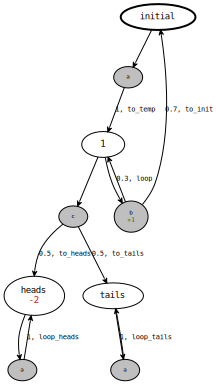

In [3]:
%states
atomic ctrl S0 = 0;
atomic ctrl S1 = 0;
atomic ctrl S2 = 0;
atomic ctrl S3 = 0;

big initial = S0;
big heads = S2;
big tails = S3;

action a
    react to_temp = S0 -[1.]-> S1;
    react loop_heads = S2 -[1.]-> S2;
    react loop_tails = S3 -[1.]-> S3;
end

action b[1]
    react to_init = S1 -[0.7]-> S0;
    react loop = S1 -[0.3]-> S1;
end

action c
    react to_heads = S1 -[0.5]-> S2;
    react to_tails = S1 -[0.5]-> S3;
end

begin nbrs
  init initial;
  rules = [ {to_temp, to_init, loop, to_heads, to_tails, loop_heads, loop_tails} ];
  preds = { initial, heads[1-3], tails };
end